<a href="https://colab.research.google.com/github/Agrave1/Food-Sales-Predictions/blob/main/Food_Sales_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
filename = "/content/drive/MyDrive/Portfolio Projects/sales_predictions (1).csv"
sales_df = pd.read_csv(filename)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
sales_df.drop(columns = ["Outlet_Size"], inplace = True) 

In [56]:
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace("LF", "Low Fat")
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace("low fat", "Low Fat")
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace("reg", "Regular")

In [57]:
drop_visibility = sales_df.index[sales_df["Item_Visibility"] == 0].tolist()
sales_df2 = sales_df.drop(sales_df.index[drop_visibility])
display(sales_df.shape)
sales_df2.shape

(8523, 11)

(7997, 11)

In [58]:
sales_df2.dropna(subset = ["Item_Weight"], inplace = True)
sales_df2.shape

(6624, 11)

In [59]:
sales_df2["Item_Weight"].describe()

count    6624.000000
mean       12.876462
std         4.644317
min         4.555000
25%         8.785000
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [60]:
weight_filter = (sales_df2["Item_Weight"] >= 8) & (sales_df2["Item_Weight"] <= 17)
sales_df3 = sales_df2.loc[weight_filter, :]

In [76]:
mean_weight = sales_df["Item_Weight"].mean()
sales_df["Item_Weight"].fillna(mean_weight, inplace = True)

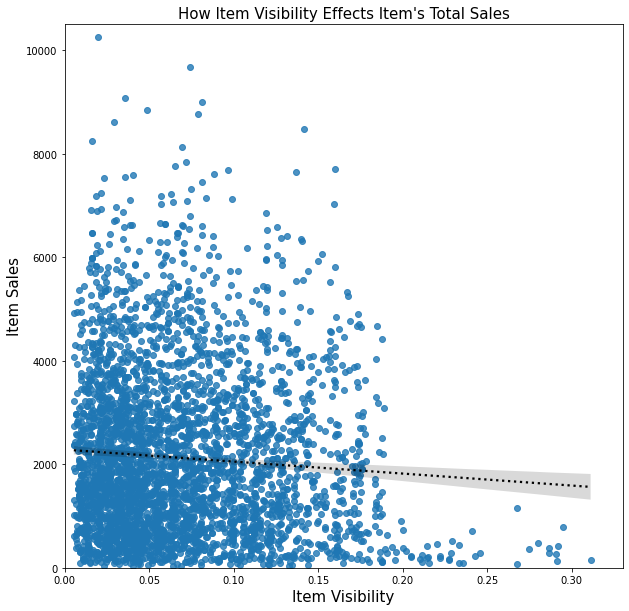

In [101]:
plt.figure(figsize = (10,10))
ax = sns.regplot(data = sales_df3, x = "Item_Visibility", y = "Item_Outlet_Sales", line_kws = {"color" : "black", "ls" : ":"})
plt.xlim(left = 0, right = .33)
plt.ylim(bottom= 0, top = 10500)
plt.title("How Item Visibility Effects Item's Total Sales", fontsize = 15)
plt.xlabel(xlabel = "Item Visibility", fontsize = 15)
plt.ylabel(ylabel = "Item Sales", fontsize = 15)
plt.show()
#Surprisingly a slight negative correlation between an item's visibility and it's overall sales

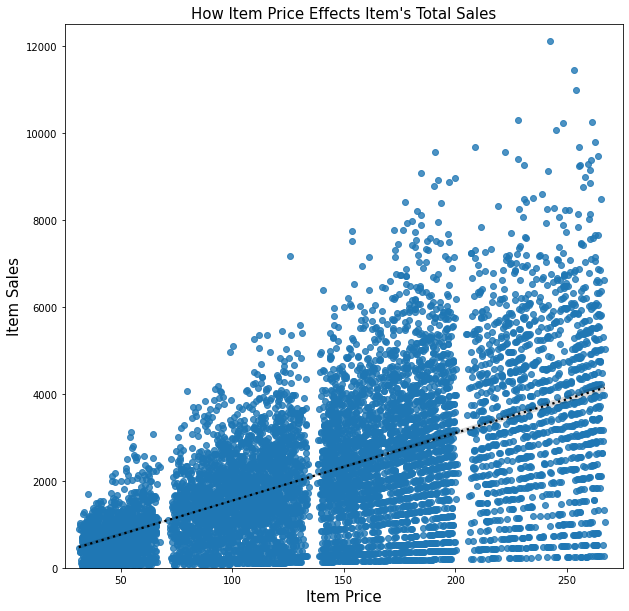

In [100]:
plt.figure(figsize = (10,10))
ax = sns.regplot(data = sales_df, x = "Item_MRP", y = "Item_Outlet_Sales", line_kws = {"color" : "black", "ls" : ":"})
plt.title("How Item Price Effects Item's Total Sales", fontsize = 15)
plt.xlim(left = 25, right = 275)
plt.ylim(bottom= 0, top = 12500)
plt.xlabel(xlabel = "Item Price", fontsize = 15)
plt.ylabel(ylabel = "Item Sales", fontsize = 15)
plt.show()
#A strong correlation is shown between an individual item's price and it's total sales